In [23]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42	

In [36]:
weights = torch.load('checkpoints/weather_336_96_TERNet_custom_ftM_sl336_pl96_pattern144_cycle_pattern_daily+weekly+monthly+yearly_nums_4_mlp_seed2024/weights.pth', map_location=torch.device('cuda:1'))
print(weights)
print(weights.shape)

tensor([[1.2561e-01, 1.0205e-03, 3.9959e+00,  ..., 2.0931e-03, 1.0519e-03,
         7.2231e-01],
        [1.2377e-01, 1.2484e-03, 3.9950e+00,  ..., 1.5285e-03, 6.2292e-04,
         6.9120e-01],
        [1.3465e-01, 1.9662e-03, 3.9922e+00,  ..., 1.0160e-03, 4.1178e-04,
         6.9742e-01],
        ...,
        [1.3351e-01, 6.8809e-04, 3.9964e+00,  ..., 2.1597e-03, 1.0820e-03,
         6.6372e-01],
        [1.3596e-01, 3.2806e-04, 3.9981e+00,  ..., 6.4094e-03, 3.6032e-03,
         6.6789e-01],
        [1.3512e-01, 7.0038e-04, 3.9965e+00,  ..., 1.0135e-02, 5.7659e-03,
         6.5986e-01]], device='cuda:1', requires_grad=True)
torch.Size([64, 126])


In [37]:
pred_error_perio = torch.load('checkpoints/weather_336_96_TERNet_custom_ftM_sl336_pl96_pattern144_cycle_pattern_daily+weekly+monthly+yearly_nums_4_mlp_seed2024/pred_error_perio.pth', map_location=torch.device('cuda:1'))
pred_error_perio = pred_error_perio.squeeze(-1)  # 去掉最后一维，形状变为 torch.Size([64, 96, 105])
# 取最后一维度的前 5 个元素
pred_error_perio = pred_error_perio[0, :, 1:5]  # 形状变为 torch.Size([64, 96, 5])
# 输出结果
print(pred_error_perio)
print(pred_error_perio.shape)

tensor([[-0.0905, -0.0626, -0.0538, -0.0932],
        [-0.0753, -0.0555, -0.0457, -0.0876],
        [-0.0913, -0.0745, -0.0819, -0.1162],
        [-0.1235, -0.1103, -0.1108, -0.1350],
        [-0.0652, -0.0414, -0.0482, -0.0812],
        [-0.1182, -0.1018, -0.1009, -0.1318],
        [-0.0441, -0.0285, -0.0347, -0.0564],
        [-0.0732, -0.0607, -0.0543, -0.0903],
        [-0.0517, -0.0246, -0.0374, -0.0657],
        [-0.0898, -0.0760, -0.0869, -0.1182],
        [-0.0798, -0.0684, -0.0670, -0.0919],
        [-0.0760, -0.0594, -0.0519, -0.0921],
        [-0.0931, -0.0805, -0.0753, -0.0993],
        [-0.0907, -0.0788, -0.0766, -0.1191],
        [-0.1040, -0.0792, -0.0809, -0.1124],
        [-0.0808, -0.0689, -0.0675, -0.1070],
        [-0.0891, -0.0757, -0.0706, -0.1093],
        [-0.1029, -0.0802, -0.0855, -0.1228],
        [-0.0866, -0.0766, -0.0763, -0.1108],
        [-0.1306, -0.1037, -0.1012, -0.1370],
        [-0.1250, -0.1024, -0.0978, -0.1444],
        [-0.1022, -0.0845, -0.0887

In [38]:
print(pred_error_perio[:,0])

tensor([-0.0905, -0.0753, -0.0913, -0.1235, -0.0652, -0.1182, -0.0441, -0.0732,
        -0.0517, -0.0898, -0.0798, -0.0760, -0.0931, -0.0907, -0.1040, -0.0808,
        -0.0891, -0.1029, -0.0866, -0.1306, -0.1250, -0.1022, -0.1434, -0.1374,
        -0.1310, -0.1445, -0.1224, -0.1310, -0.1464, -0.1386, -0.1709, -0.1685,
        -0.1721, -0.1652, -0.1651, -0.1469, -0.1391, -0.1928, -0.1834, -0.1739,
        -0.1736, -0.1711, -0.2068, -0.1928, -0.2074, -0.1875, -0.2295, -0.1792,
        -0.1703, -0.1990, -0.2214, -0.2354, -0.2410, -0.2307, -0.2200, -0.2141,
        -0.2254, -0.2062, -0.2298, -0.2097, -0.2227, -0.2212, -0.2391, -0.2302,
        -0.2151, -0.2303, -0.2225, -0.2249, -0.2267, -0.2379, -0.2136, -0.2024,
        -0.2508, -0.2146, -0.2297, -0.2290, -0.2363, -0.2280, -0.2089, -0.2118,
        -0.2171, -0.1986, -0.1924, -0.1980, -0.2216, -0.1983, -0.2190, -0.1910,
        -0.2042, -0.2115, -0.1882, -0.1889, -0.1862, -0.2191, -0.1941, -0.2025],
       device='cuda:1', grad_fn=<Select

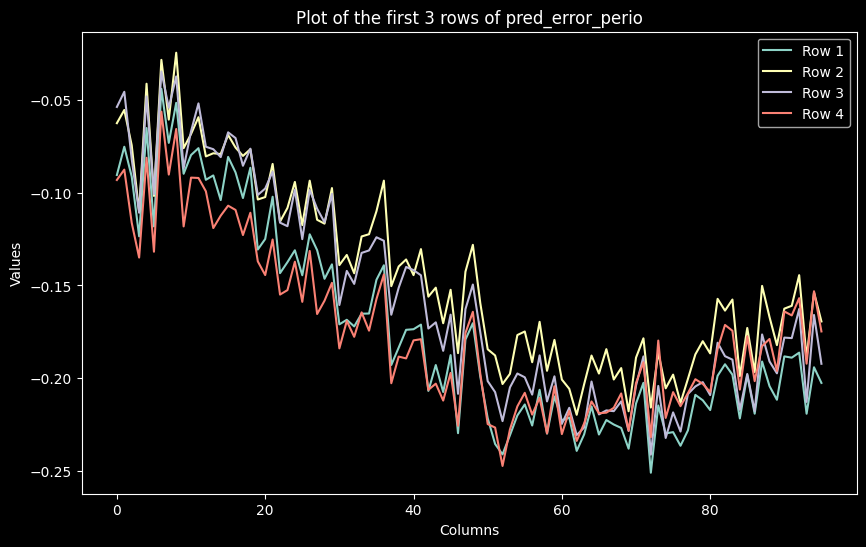

In [39]:
# 绘制前三行的结果
plt.figure(figsize=(10, 6))
for i in range(4):
    # 使用 .detach() 来分离张量，然后转换为 numpy
    plt.plot(pred_error_perio[:,i].detach().cpu().numpy(), label=f'Row {i+1}')

plt.title('Plot of the first 3 rows of pred_error_perio')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend()
plt.show()

In [40]:
error = torch.load('checkpoints/weather_336_96_TERNet_custom_ftM_sl336_pl96_pattern144_cycle_pattern_daily+weekly+monthly+yearly_nums_4_mlp_seed2024/error.pth', map_location=torch.device('cuda:1'))
# 取前 4 个元素
error = error[0, :, :4]  # 形状变为 torch.Size([64, 96, 4])
# 输出结果
print(error)
print(error.shape)

tensor([[-0.5181, -0.3904, -0.4940, -0.4081],
        [-0.3679, -0.3411, -0.4073, -0.3514],
        [-0.3777, -0.1064, -0.3198, -0.2759],
        ...,
        [-0.4940, -0.4519, -0.4949, -0.5035],
        [-0.3358, -0.3318, -0.3717, -0.4382],
        [-0.4082, -0.2903, -0.2876, -0.4178]], device='cuda:1',
       grad_fn=<SliceBackward0>)
torch.Size([336, 4])


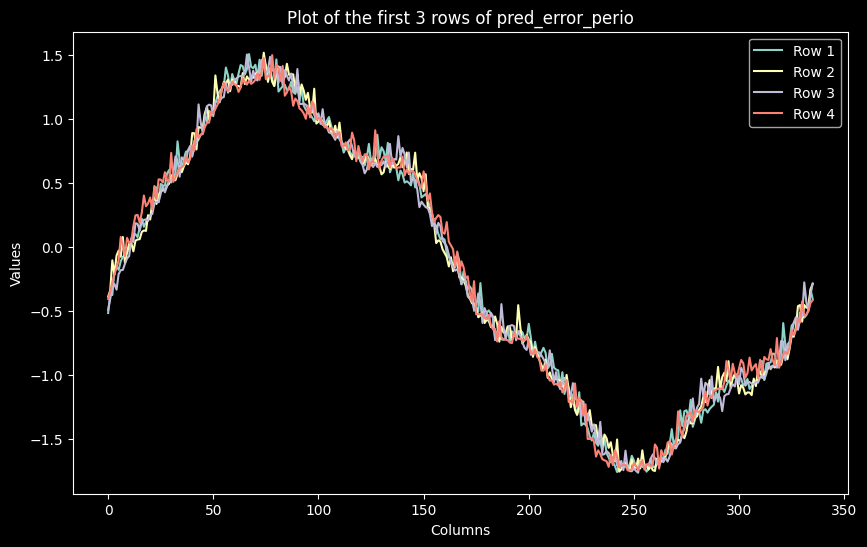

In [41]:
# 绘制前三行的结果
plt.figure(figsize=(10, 6))
for i in range(4):
    # 使用 .detach() 来分离张量，然后转换为 numpy
    plt.plot(error[:,i].detach().cpu().numpy(), label=f'Row {i+1}')

plt.title('Plot of the first 3 rows of pred_error_perio')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend()
plt.show()

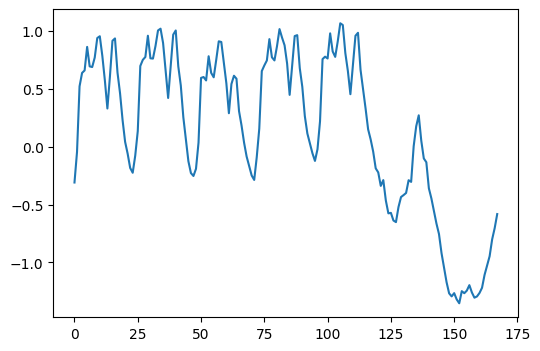

In [ ]:
checkpoint = torch.load('checkpoints/Electricity_96_96_CycleNet_custom_ftM_sl96_pl96_cycle168_linear_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
weights = checkpoint['cycleQueue.data'].cpu().numpy()[:,320]
shifted_weights = np.roll(weights, 41)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
plt.axis('on') 
# Save the plot as a SVG file
# plt.savefig('electricity[320].pdf', bbox_inches='tight', transparent=False)
plt.show()

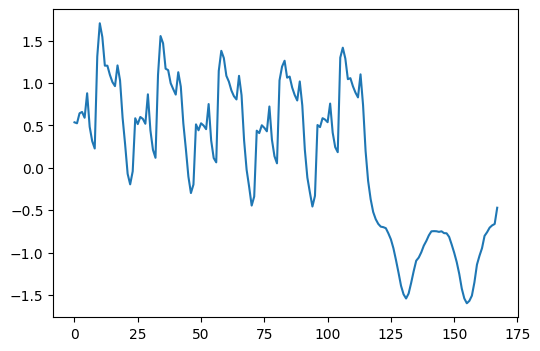

In [ ]:
checkpoint = torch.load('checkpoints/Electricity_96_96_CycleNet_custom_ftM_sl96_pl96_cycle168_linear_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
weights = checkpoint['cycleQueue.data'].cpu().numpy()[:,319]
shifted_weights = np.roll(weights, 41)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
plt.savefig('electricity[319].pdf', bbox_inches='tight', transparent=False)
plt.show()

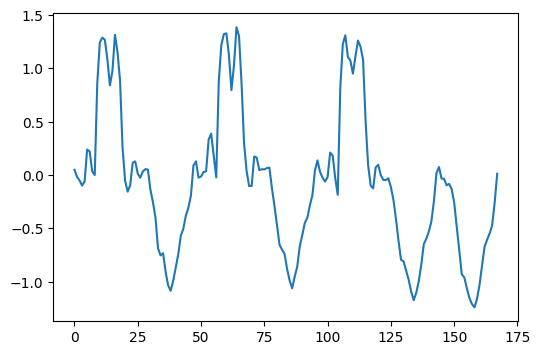

In [ ]:
checkpoint = torch.load('checkpoints/Electricity_96_96_CycleNet_custom_ftM_sl96_pl96_cycle168_linear_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
weights = checkpoint['cycleQueue.data'].cpu().numpy()[:,317]
shifted_weights = np.roll(weights, 41)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
plt.savefig('electricity[317].pdf', bbox_inches='tight', transparent=False)
plt.show()

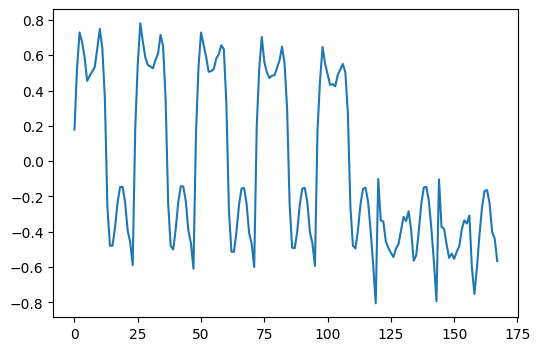

In [ ]:
checkpoint = torch.load('checkpoints/Electricity_96_96_CycleNet_custom_ftM_sl96_pl96_cycle168_linear_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
weights = checkpoint['cycleQueue.data'].cpu().numpy()[:,310]
shifted_weights = np.roll(weights, 41)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
plt.savefig('electricity[310].pdf', bbox_inches='tight', transparent=False)
plt.show()

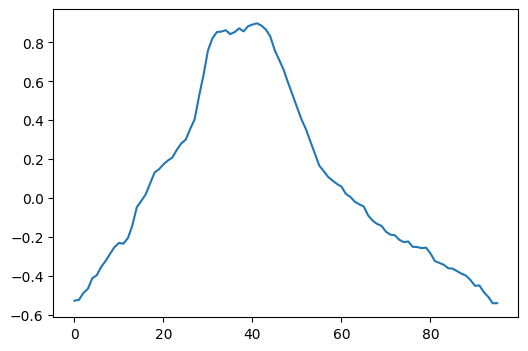

In [ ]:
checkpoint = torch.load('checkpoints/ETTm1_96_96_CycleNet_ETTm1_ftM_sl96_pl96_cycle96_linear_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
weights = checkpoint['cycleQueue.data'].cpu().numpy()[:,6]
shifted_weights = np.roll(weights, 72)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
plt.savefig('ettm1[6].pdf', bbox_inches='tight', transparent=False)
plt.show()

In [62]:
# 加载 checkpoint
checkpoint = torch.load('checkpoints/weather_336_96_TERNet_custom_ftM_sl336_pl96_pattern144_cycle_pattern_daily+weekly+monthly+yearly_nums_4_mlp_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
# 打印所有的键（key）
for key in checkpoint.keys():
    print(key)

module.cswnet.fc1.weight
module.cswnet.fc1.bias
module.cswnet.bn1.weight
module.cswnet.bn1.bias
module.cswnet.bn1.running_mean
module.cswnet.bn1.running_var
module.cswnet.bn1.num_batches_tracked
module.cswnet.fc2.weight
module.cswnet.fc2.bias
module.patternQueue.data
module.model.0.weight
module.model.0.bias
module.model.2.weight
module.model.2.bias


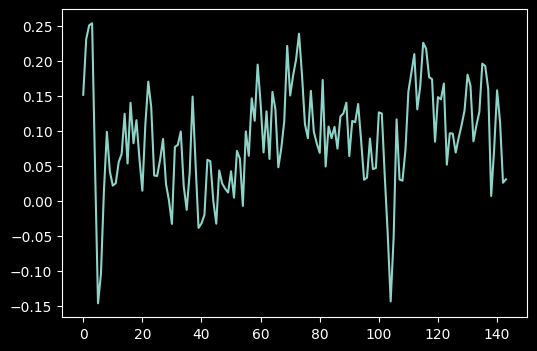

In [63]:
# checkpoint = torch.load('checkpoints/weather_96_96_CycleNet_custom_ftM_sl96_pl96_cycle144_linear_seed2024/checkpoint.pth', map_location=torch.device('cuda:0'))
weights = checkpoint['module.patternQueue.data'].cpu().numpy()[:,6]
shifted_weights = np.roll(weights, 100)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
# plt.savefig('weather[6].pdf', bbox_inches='tight', transparent=False)
plt.show()

In [55]:
checkpoint = torch.load('checkpoints/weather_96_96_Multiscale_DRPK_custom_ftM_sl96_pl96_cycle144_cycle_pattern_daily+weekly_nums_2_mlp_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
for key in checkpoint.keys():
    print(key)

module.drpkn.fc1.weight
module.drpkn.fc1.bias
module.drpkn.bn1.weight
module.drpkn.bn1.bias
module.drpkn.bn1.running_mean
module.drpkn.bn1.running_var
module.drpkn.bn1.num_batches_tracked
module.drpkn.fc2.weight
module.drpkn.fc2.bias
module.cycleQueue.data
module.model.0.weight
module.model.0.bias
module.model.2.weight
module.model.2.bias


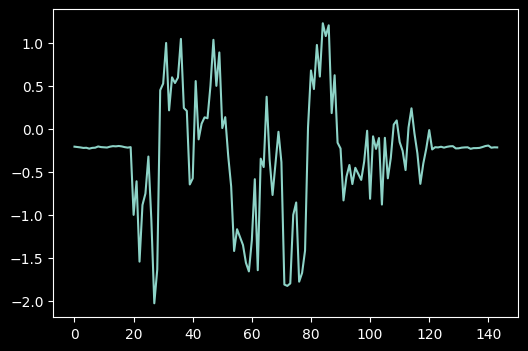

In [56]:
weights = checkpoint['module.cycleQueue.data'].cpu().numpy()[:,6]
shifted_weights = np.roll(weights, 20)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
# plt.savefig('weather[6].pdf', bbox_inches='tight', transparent=False)
plt.show()

In [57]:
checkpoint = torch.load('checkpoints/weather_96_96_Multiscale_DRPK_custom_ftM_sl96_pl96_cycle144_cycle_pattern_daily+weekly+monthly_nums_3_mlp_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
for key in checkpoint.keys():
    print(key)

module.drpkn.fc1.weight
module.drpkn.fc1.bias
module.drpkn.bn1.weight
module.drpkn.bn1.bias
module.drpkn.bn1.running_mean
module.drpkn.bn1.running_var
module.drpkn.bn1.num_batches_tracked
module.drpkn.fc2.weight
module.drpkn.fc2.bias
module.cycleQueue.data
module.model.0.weight
module.model.0.bias
module.model.2.weight
module.model.2.bias


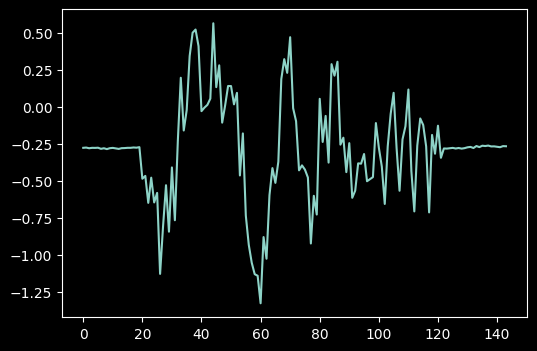

In [58]:
weights = checkpoint['module.cycleQueue.data'].cpu().numpy()[:,6]
shifted_weights = np.roll(weights, 20)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
# plt.savefig('weather[6].pdf', bbox_inches='tight', transparent=False)
plt.show()

In [59]:
checkpoint = torch.load('checkpoints/weather_96_96_Multiscale_DRPK_custom_ftM_sl96_pl96_cycle144_cycle_pattern_daily+weekly+monthly+yearly_nums_4_mlp_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
for key in checkpoint.keys():
    print(key)

module.drpkn.fc1.weight
module.drpkn.fc1.bias
module.drpkn.bn1.weight
module.drpkn.bn1.bias
module.drpkn.bn1.running_mean
module.drpkn.bn1.running_var
module.drpkn.bn1.num_batches_tracked
module.drpkn.fc2.weight
module.drpkn.fc2.bias
module.cycleQueue.data
module.model.0.weight
module.model.0.bias
module.model.2.weight
module.model.2.bias


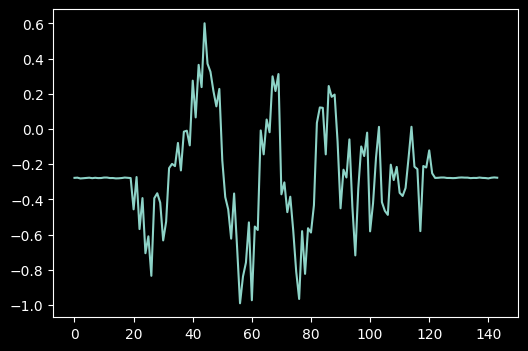

In [60]:
weights = checkpoint['module.cycleQueue.data'].cpu().numpy()[:,6]
shifted_weights = np.roll(weights, 20)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
# plt.savefig('weather[6].pdf', bbox_inches='tight', transparent=False)
plt.show()

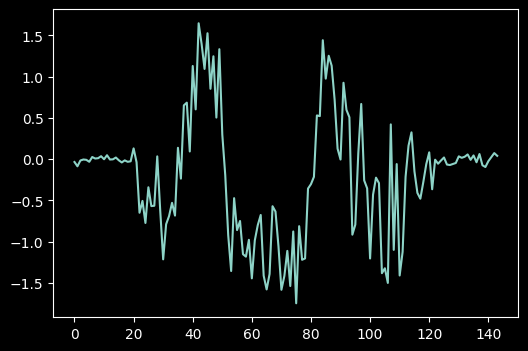

In [36]:
weights_daily = checkpoint['module.cycleQueue_daily.data'].cpu().numpy()[:,6]
weights_weekly = checkpoint['module.cycleQueue_weekly.data'].cpu().numpy()[:,6]
weights_monthly = checkpoint['module.cycleQueue_monthly.data'].cpu().numpy()[:,6]
weights_yearly = checkpoint['module.cycleQueue_yearly.data'].cpu().numpy()[:,6]
weights = weights_daily + weights_weekly + weights_monthly +weights_yearly
# weights = weights[:24]
shifted_weights = np.roll(weights, 20)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
# plt.savefig('weather[6].pdf', bbox_inches='tight', transparent=False)
plt.show()

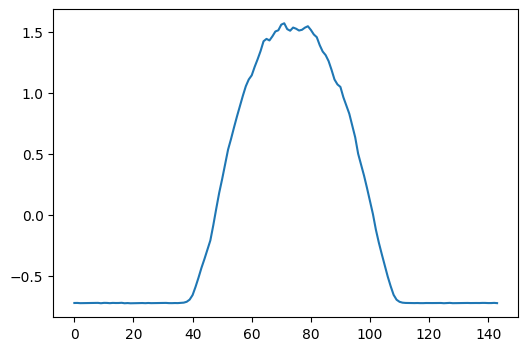

In [ ]:
checkpoint = torch.load('checkpoints/Solar_96_96_CycleNet_Solar_ftM_sl96_pl96_cycle144_linear_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
weights = checkpoint['cycleQueue.data'].cpu().numpy()[:,136]
shifted_weights = np.roll(weights, 52)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
plt.savefig('solar[136].pdf', bbox_inches='tight', transparent=False)
plt.show()

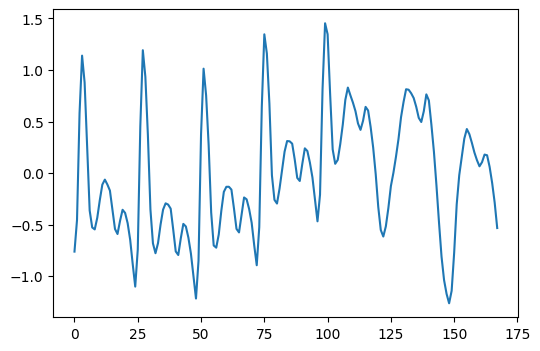

In [ ]:
checkpoint = torch.load('checkpoints/traffic_96_96_CycleNet_custom_ftM_sl96_pl96_cycle168_linear_seed2024/checkpoint.pth', map_location=torch.device('cuda:1'))
weights = checkpoint['cycleQueue.data'].cpu().numpy()[:,606]
shifted_weights = np.roll(weights, 142)
plt.figure(figsize=(6, 4))
plt.plot(shifted_weights)
# Save the plot as a SVG file
plt.savefig('traffic[606].pdf', bbox_inches='tight', transparent=False)
plt.show()